In [85]:
import pytreenet as ptn
import numpy as np
import matplotlib.pyplot as plt

# Exact (Qutip)

In [88]:
# System initialization
Lx = 4
Ly = 4
spin = 0.5

Jx =  1.5
Jy =  0.5 
Jz =  -4  
h =   2
periodic = True

system = ptn.AnisotropicHeisenberg2D_Qutip( Lx, Ly, spin, Jx, Jy, Jz, h, periodic)

# Create initial state
black_state = np.array([0,1])
white_state = np.array([1,0])
psi0 = system.alternating_product_state(black_state, white_state, pattern= "checkerboard")
#psi0 = system.uniform_product_state([1, 0])

# Evolve system
end_time = 1
dt = 0.01
result = system.evolve_system(psi0, end_time=end_time, dt=dt)

c:\Users\edpou\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\edpou\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


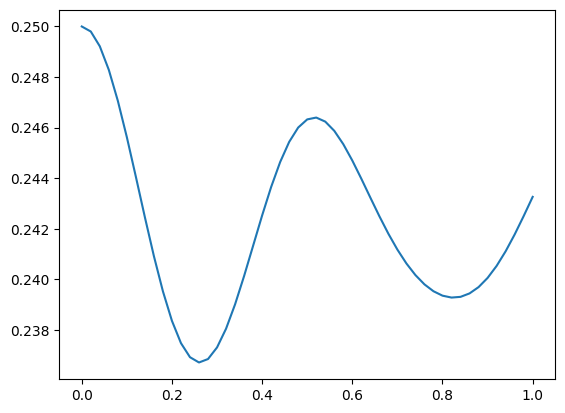

In [101]:
oc_exact, times = system.specific_site_correlation_results( evaluation_time = 2,
                                                            results = result, 
                                                            site1 = (0,0), site2 = (2,0))
plt.plot(times, oc_exact, label="exact")



In [102]:
import pickle
import pandas as pd
from tabulate import tabulate

# Load the Pickle file
with open('tdvp_profiling_data.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

# Extract profiling data (not profiling details)
profiling_data = loaded_data['profiling_data']
unique_cache_calls = set(entry['update_tree_cache_calls'] for entry in profiling_data)
unique_cache_calls = sorted(unique_cache_calls)
print("Available cache_calls_ncalls values:", unique_cache_calls)

# Compute scores using the profiling_data
# Ensure ptn.compute_scores is compatible with this structure
scored_data = ptn.compute_scores(profiling_data, 30 , alpha=1, gamma=0)

# Convert the scored data to a DataFrame for display
scored_df = pd.DataFrame(scored_data)

# Sort the DataFrame by the 'Score' column in descending order
scored_df = scored_df.sort_values(by='Score', ascending=False)

# Display the top configurations
print("\n=== Top Configurations ===")
print(tabulate(scored_df, headers='keys', tablefmt='pretty'))


Available cache_calls_ncalls values: [30, 32, 34, 36, 38, 40, 42, 44, 46, 48]

=== Top Configurations ===
+---+-----------+---------------------+-------------------------+-------------------+------------------+--------+-------+------------------+
|   | Config_ID |   Running_Time_s    | update_tree_cache_calls |       WPLI        | Z_Running_Time_s | Z_WPLI | Score | Normalized_Score |
+---+-----------+---------------------+-------------------------+-------------------+------------------+--------+-------+------------------+
| 0 | Config 82 | 0.11667060852050781 |           30            | 4.853109690149354 |        0         |   0    |   0   |       1.0        |
+---+-----------+---------------------+-------------------------+-------------------+------------------+--------+-------+------------------+


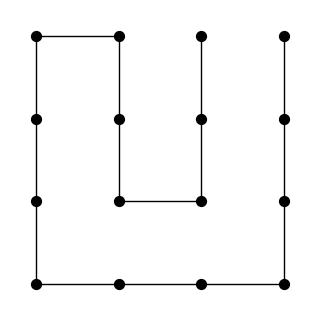

In [71]:
# Load the Pickle file
with open('tdvp_profiling_data.pkl', 'rb') as f:
    profiling_data = pickle.load(f)

# Extract profiling details from the loaded data
profiling_details = profiling_data['profiling_details']

config_id = 'Config 82'
ttn = profiling_details[config_id]['Spanning_tree']
ptn.Visualize_tree(profiling_details[config_id]['tree_dict'],6)  

In [93]:
black_state = np.array([0,1])
white_state = np.array([1,0])
ttn = ptn.alternating_product_state(ttn, black_state, white_state, bond_dim = 1,  pattern = "checkerboard")
#local_state = np.array([0,1])
#ttn = ptn.uniform_product_state(ttn ,local_state, bond_dim= 3)

Lx = 4
Ly = 4
J_x =  1.5 
J_y =  0.5 
J_z =  -4 
h_z = 2

H1 = ptn.Anisotropic_Heisenberg_ham(J_x, J_y, J_z, h_z, Lx, Ly , boundary_condition = "periodic")
H1 = H1.pad_with_identities(ttn , symbolic= True)
ttno = ptn.TTNO.from_hamiltonian(H1, ttn)

SCF = ptn.spatial_correlation_function_sz(Lx, Ly, dist = 2, dim = 2, mode = "HV")
SCF = SCF.pad_with_identities(ttn, symbolic= True)
SCF = ptn.TTNO.from_hamiltonian(SCF, ttn)

M = ptn.total_magnetization(Lx, Ly, dim = 2)
M = M.pad_with_identities(ttn, symbolic= True)
M = ptn.TTNO.from_hamiltonian(M, ttn)

In [43]:
from setuptools import setup

setup(
    name="matrix_exponential_action",
    version="0.1.0",
    packages=["matrix_exponential_action"],
    install_requires=[
        "numpy",
        "scipy",
        "torch"
    ]
)

c:\Users\edpou\AppData\Local\Programs\Python\Python312\Lib\site-packages\setuptools\config\expand.py:124: SetuptoolsWarning: File 'c:\\Users\\edpou\\Desktop\\Ed\\PyTreeNet-Project_09\\PyTreeNet\\README.md' cannot be found
  return '\n'.join(
c:\Users\edpou\AppData\Local\Programs\Python\Python312\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:78: SetuptoolsWarning: `install_requires` overwritten in `pyproject.toml` (dependencies)
  corresp(dist, value, root_dir)


AttributeError: 'tuple' object has no attribute 'tb_frame'

In [96]:
expansion_params = {"ExpansionMode": ptn.ExpansionMode.TTN,
                    "num_vecs": 3, 
                    "tau": 0.01,
                    "SVDParameters": ptn.SVDParameters(max_bond_dim = np.inf , rel_tol= -np.inf , total_tol = -np.inf),
                    "expansion_steps" : 7,
                    "tol": 0.2,
                    "tol_step_increase": 0.08,
                    "tol_step_decrease": 0.01,
                    "num_second_trial" : 10,
                    "max_bond": 300,
                    "rel_tot_bond": (5,50)}


config= ptn.TTNTimeEvolutionConfig(record_bond_dim = True,
                                   Expansion_params = expansion_params)

tdvp = ptn.SecondOrderOneSiteTDVP(initial_state = ttn,
                                 hamiltonian = ttno,
                                 time_step_size = 0.01,
                                 final_time = 1,
                                 operators = [SCF,M],
                                 config = config)

In [ ]:
tdvp = ptn.SecondOrderTwoSiteTDVP(initial_state = ttn,
                                 hamiltonian = ttno,
                                 time_step_size = 0.01,
                                 final_time = 1,
                                 operators = SCF,
                                 truncation_parameters= ptn.SVDParameters(max_bond_dim = np.inf, rel_tol= 1e-3, total_tol = -np.inf),
                                 config = config)
tdvp.run(evaluation_time = 2)

In [97]:
tdvp.RUN(evaluation_time = 2 , filepath = r"C:\Users\edpou\Desktop\Ed\PyTreeNet-Project_09\PyTreeNet\results\2" )

  9%|▉         | 9/101 [00:00<00:06, 14.51it/s]

SVD MAX: 3
Initial tol: 0.2
Acceptable expansion found in initial attempt: 27
Final expanded_dim: 27 : 45 ---> 72


 15%|█▍        | 15/101 [00:00<00:05, 16.22it/s]

SVD MAX: 6
Initial tol: 0.2
Acceptable expansion found in initial attempt: 27
Final expanded_dim: 27 : 72 ---> 99


 23%|██▎       | 23/101 [00:01<00:07, 10.87it/s]

SVD MAX: 9
Initial tol: 0.2
Acceptable expansion found in initial attempt: 27
Final expanded_dim: 27 : 99 ---> 126


 31%|███       | 31/101 [00:03<00:10,  6.84it/s]

SVD MAX: 12
Initial tol: 0.2


 32%|███▏      | 32/101 [00:03<00:15,  4.47it/s]

Acceptable expansion found in initial attempt: 29
Final expanded_dim: 29 : 126 ---> 155


 39%|███▊      | 39/101 [00:05<00:18,  3.39it/s]

SVD MAX: 16
Initial tol: 0.2


 40%|███▉      | 40/101 [00:06<00:26,  2.27it/s]

Acceptable expansion found in initial attempt: 33
Final expanded_dim: 33 : 155 ---> 188


 47%|████▋     | 47/101 [00:10<00:32,  1.64it/s]

SVD MAX: 20
Initial tol: 0.2


 48%|████▊     | 48/101 [00:12<00:44,  1.19it/s]

Acceptable expansion found in initial attempt: 27
Final expanded_dim: 27 : 188 ---> 215


 54%|█████▍    | 55/101 [00:19<00:45,  1.02it/s]

SVD MAX: 24
Initial tol: 0.2


 55%|█████▌    | 56/101 [00:21<00:59,  1.32s/it]

Acceptable expansion found in initial attempt: 27
Final expanded_dim: 27 : 215 ---> 242


 62%|██████▏   | 63/101 [00:32<01:00,  1.60s/it]

SVD MAX: 30
Initial tol: 0.2


 63%|██████▎   | 64/101 [00:35<01:15,  2.05s/it]

Acceptable expansion found in initial attempt: 36
Final expanded_dim: 36 : 242 ---> 278


 70%|███████   | 71/101 [00:58<01:33,  3.13s/it]

SVD MAX: 34
Initial tol: 0.2


 71%|███████▏  | 72/101 [01:04<01:49,  3.79s/it]

Acceptable expansion found in initial attempt: 44
Exceed max bond dimension: 300
Final expanded_dim: 44 : 278 ---> 322


100%|██████████| 101/101 [02:34<00:00,  1.53s/it]


c:\Users\edpou\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\edpou\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


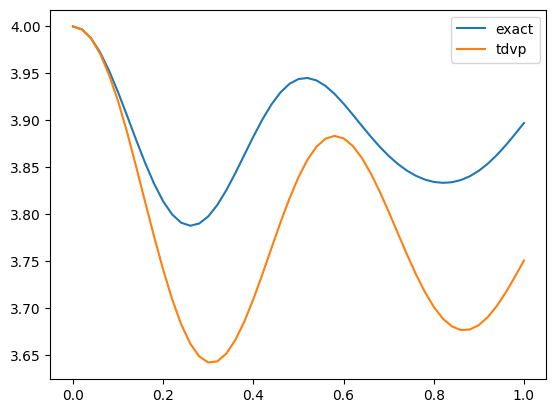

In [99]:
oc_exact, times = system.spatial_correlation_function_results(evaluation_time=2,
                                                              results=result,
                                                              distance=2,
                                                              mode = "HV")
plt.plot(times, oc_exact, label="exact")
plt.plot(times ,tdvp.operator_results()[0], label="tdvp")


plt.legend()

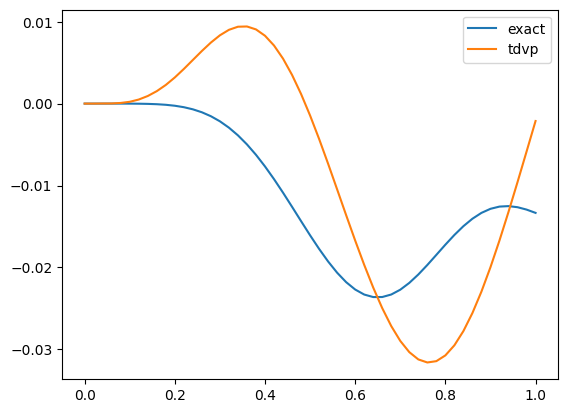

In [ ]:
oc_exact, times = system.total_magnetization_results(evaluation_time=2,
                                                              results=result,)
plt.plot(times, oc_exact, label="exact")
plt.plot(times ,tdvp.operator_results()[1], label="tdvp")


plt.legend()

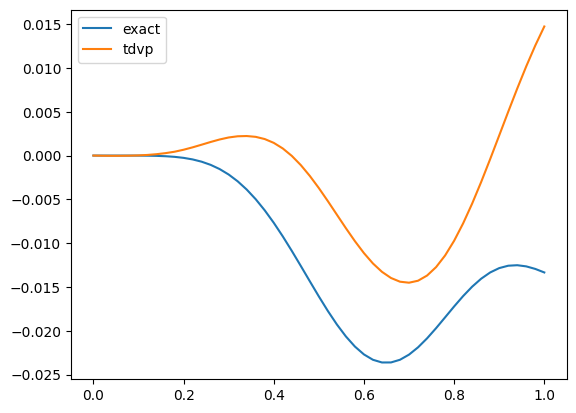

In [ ]:
oc_exact, times = system.total_magnetization_results(evaluation_time=2,
                                                              results=result,)
plt.plot(times, oc_exact, label="exact")
plt.plot(times ,tdvp.operator_results()[1], label="tdvp")


plt.legend()

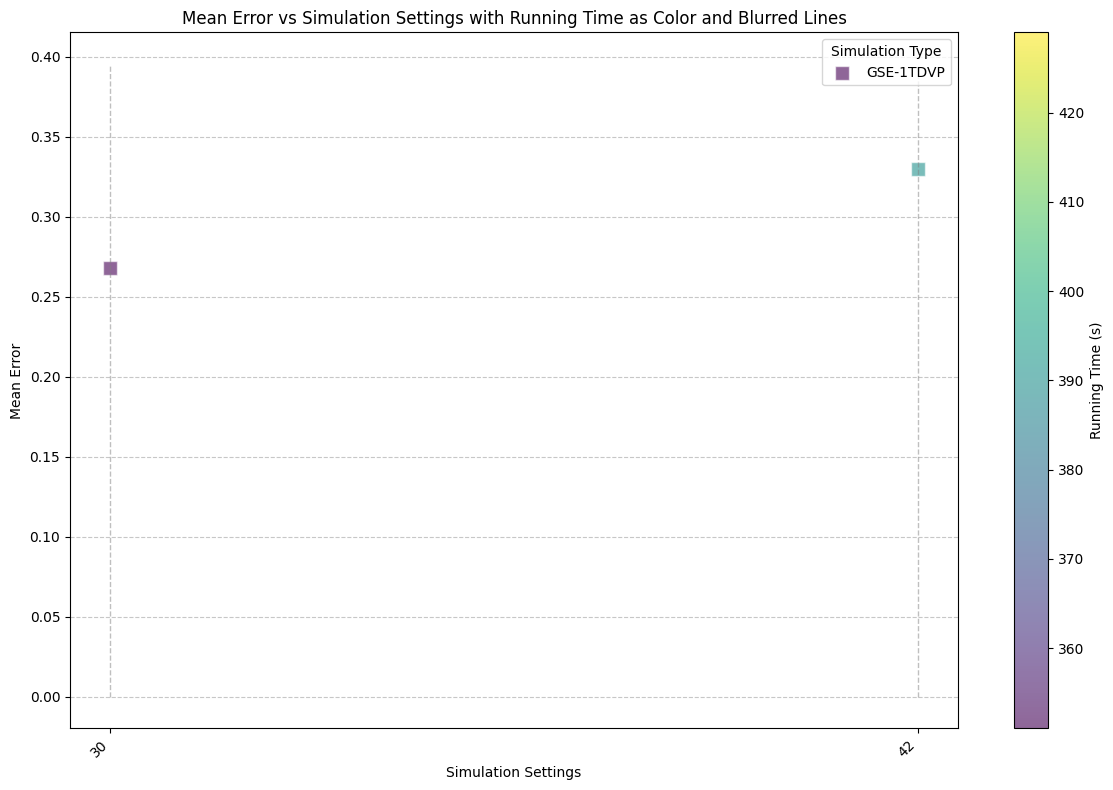

In [234]:
import matplotlib.pyplot as plt
import numpy as np

def plot_simulation_results(exact_solution, simulation_data):
    """
    Generate a bubble plot to visualize mean error vs simulation settings with blurred lines for each simulation type.

    Parameters:
    - exact_solution: np.ndarray, the exact solution values.
    - simulation_data: dict, where each key corresponds to a simulation setting name and value contains:
        - 'types': list of str, types of simulations (e.g., ["2TDVP", "GSE-1TDVP"])
        - 'running_times': list of float, running times corresponding to each type
        - 'results': list of list of np.ndarray, results for each simulation type

    Returns:
    - None: Displays the plot.
    """
    labels = []
    mean_errors = []
    running_times = []
    types = []
    x_positions = []

    current_x = 0
    for setting, data in simulation_data.items():
        for sim_type, running_time, results in zip(data['types'], data['running_times'], data['results']):
            # Ensure results and exact_solution have matching shapes
            results = np.array(results).real
            exact_solution = exact_solution.real

            if results.shape != exact_solution.shape:
                raise ValueError(f"Shape mismatch: results shape {results.shape} and exact_solution shape {exact_solution.shape} must match.")
            
            labels.append(f"{setting} ({sim_type})")
            x_positions.append(current_x)
            types.append(sim_type)
            running_times.append(running_time)

            # Calculate aggregated errors
            errors = np.abs(results - exact_solution)
            mean_errors.append(np.mean(errors))

        current_x += 1

    # Define marker types for simulation types
    marker_map = {'2TDVP': 'o', 'GSE-1TDVP': 's'}

    # Bubble plot with distinct markers
    plt.figure(figsize=(12, 8))
    for i, (x, sim_type, running_time) in enumerate(zip(x_positions, types, running_times)):
        plt.scatter(
            x, mean_errors[i], 
            s=100,  # Fixed bubble size
            c=[running_time], 
            cmap='viridis', 
            alpha=0.6, 
            edgecolors="w", 
            linewidth=1, 
            marker=marker_map[sim_type],
            label=sim_type if sim_type not in plt.gca().get_legend_handles_labels()[1] else None  # Add legend once per type
        )

    # Determine y-axis range
    max_y = max(mean_errors) * 1.2  # Extend slightly above maximum error

    # Add blur lines
    for i, (x, sim_type) in enumerate(zip(x_positions, types)):
        linestyle = '-' if sim_type == '2TDVP' else '--'
        plt.plot([x, x], [0, max_y], alpha=0.5, color='gray', linewidth=1, linestyle=linestyle)

    # Add labels
    plt.xticks(range(len(simulation_data)), simulation_data.keys(), rotation=45, ha='right')
    plt.colorbar(label="Running Time (s)")
    plt.legend(title="Simulation Type", loc='upper right')

    plt.xlabel("Simulation Settings")
    plt.ylabel("Mean Error")
    plt.title("Mean Error vs Simulation Settings with Running Time as Color and Blurred Lines")
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Usage Example
exact_solution = oc_exact

simulation_data = {
        '30': {
    'types': ['GSE-1TDVP'],
    'running_times': [390],
    'results': [
        np.load(r'C:\Users\edpou\Desktop\Ed\PyTreeNet-Project_09\PyTreeNet\results\1.npz')["operator0results"],
    ],
    },
            '42': {
    'types': ['GSE-1TDVP'],
    'running_times': [390],
    'results': [
        np.load(r'C:\Users\edpou\Desktop\Ed\PyTreeNet-Project_09\PyTreeNet\results\2.npz')["operator0results"],
    ],
    },
}

plot_simulation_results(exact_solution, simulation_data)


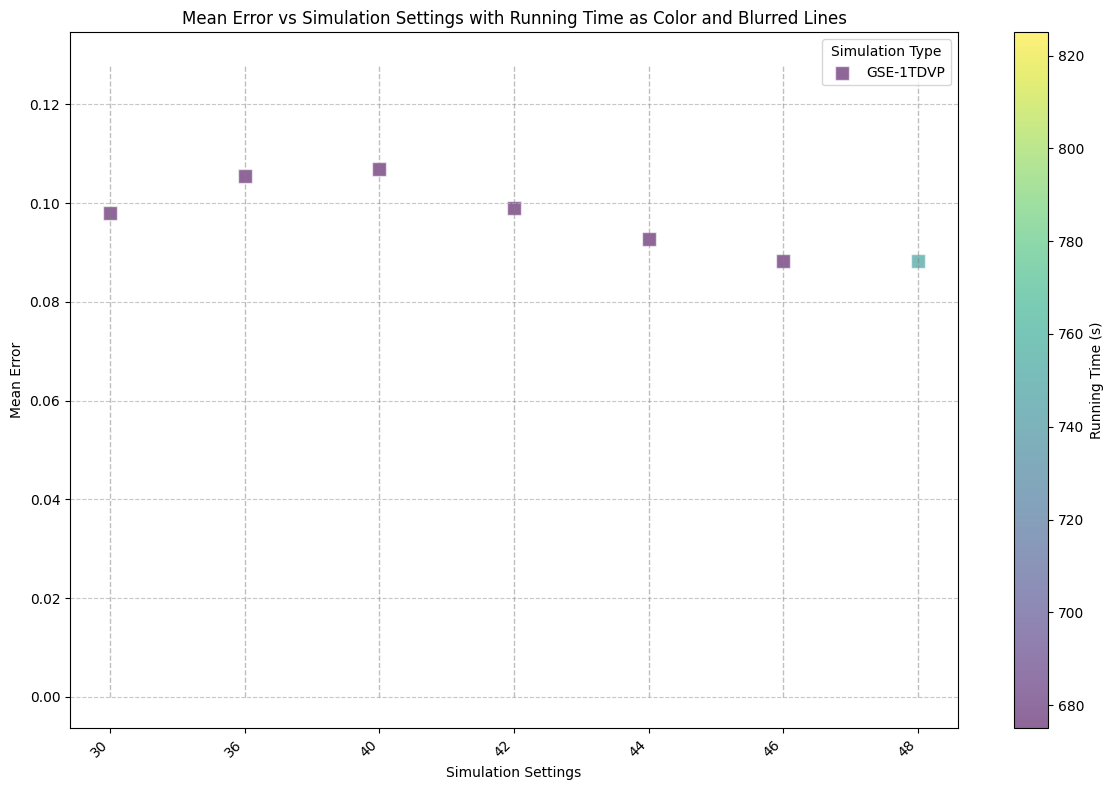

In [100]:
import matplotlib.pyplot as plt
import numpy as np

def plot_simulation_results(exact_solution, simulation_data):
    """
    Generate a bubble plot to visualize mean error vs simulation settings with blurred lines for each simulation type.

    Parameters:
    - exact_solution: np.ndarray, the exact solution values.
    - simulation_data: dict, where each key corresponds to a simulation setting name and value contains:
        - 'types': list of str, types of simulations (e.g., ["2TDVP", "GSE-1TDVP"])
        - 'running_times': list of float, running times corresponding to each type
        - 'results': list of list of np.ndarray, results for each simulation type

    Returns:
    - None: Displays the plot.
    """
    labels = []
    mean_errors = []
    running_times = []
    types = []
    x_positions = []

    current_x = 0
    for setting, data in simulation_data.items():
        for sim_type, running_time, results in zip(data['types'], data['running_times'], data['results']):
            # Ensure results and exact_solution have matching shapes
            results = np.array(results).real
            exact_solution = exact_solution.real

            if results.shape != exact_solution.shape:
                raise ValueError(f"Shape mismatch: results shape {results.shape} and exact_solution shape {exact_solution.shape} must match.")
            
            labels.append(f"{setting} ({sim_type})")
            x_positions.append(current_x)
            types.append(sim_type)
            running_times.append(running_time)

            # Calculate aggregated errors
            errors = np.abs(results - exact_solution)
            mean_errors.append(np.mean(errors))

        current_x += 1

    # Define marker types for simulation types
    marker_map = {'2TDVP': 'o', 'GSE-1TDVP': 's'}

    # Bubble plot with distinct markers
    plt.figure(figsize=(12, 8))
    for i, (x, sim_type, running_time) in enumerate(zip(x_positions, types, running_times)):
        plt.scatter(
            x, mean_errors[i], 
            s=100,  # Fixed bubble size
            c=[running_time], 
            cmap='viridis', 
            alpha=0.6, 
            edgecolors="w", 
            linewidth=1, 
            marker=marker_map[sim_type],
            label=sim_type if sim_type not in plt.gca().get_legend_handles_labels()[1] else None  # Add legend once per type
        )

    # Determine y-axis range
    max_y = max(mean_errors) * 1.2  # Extend slightly above maximum error

    # Add blur lines
    for i, (x, sim_type) in enumerate(zip(x_positions, types)):
        linestyle = '-' if sim_type == '2TDVP' else '--'
        plt.plot([x, x], [0, max_y], alpha=0.5, color='gray', linewidth=1, linestyle=linestyle)

    # Add labels
    plt.xticks(range(len(simulation_data)), simulation_data.keys(), rotation=45, ha='right')
    plt.colorbar(label="Running Time (s)")
    plt.legend(title="Simulation Type", loc='upper right')

    plt.xlabel("Simulation Settings")
    plt.ylabel("Mean Error")
    plt.title("Mean Error vs Simulation Settings with Running Time as Color and Blurred Lines")
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Usage Example
exact_solution = oc_exact

simulation_data = {
        '30': {
    'types': ['GSE-1TDVP'],
    'running_times': [390],
    'results': [
        np.load(r'C:\Users\edpou\Desktop\Ed\PyTreeNet-Project_09\PyTreeNet\results\2.npz')["operator0results"],
    ],
    },
    '36': {
    'types': ['GSE-1TDVP'],
    'running_times': [390],
    'results': [
        np.load(r'C:\Users\edpou\Desktop\Ed\PyTreeNet-Project_09\PyTreeNet\results\146_510.npz')["operator0results"],
    ],
    },
    
    '40': {
        'types': ['GSE-1TDVP'],
        'running_times': [450],
        'results': [
            np.load(r'C:\Users\edpou\Desktop\Ed\PyTreeNet-Project_09\PyTreeNet\results\3_450.npz')["operator0results"],
        ],
    },
    '42': {
        'types': ['GSE-1TDVP'],
        'running_times': [460],
        'results': [
            np.load(r'C:\Users\edpou\Desktop\Ed\PyTreeNet-Project_09\PyTreeNet\results\2_460.npz')["operator0results"],
        ],
    },
    '44': {
        'types': ['GSE-1TDVP'],
        'running_times': [470],
        'results': [
            np.load(r'C:\Users\edpou\Desktop\Ed\PyTreeNet-Project_09\PyTreeNet\results\10_470.npz')["operator0results"],
        ],
    },
    '46': {
        'types': ['GSE-1TDVP'],
        'running_times': [600],
        'results': [
            np.load(r'C:\Users\edpou\Desktop\Ed\PyTreeNet-Project_09\PyTreeNet\results\86_600.npz')["operator0results"],
        ],
    },
    '48': {
        'types': ['GSE-1TDVP'],
        'running_times': [750],
        'results': [
            np.load(r'C:\Users\edpou\Desktop\Ed\PyTreeNet-Project_09\PyTreeNet\results\89_750.npz')["operator0results"],
        ],
    },
}

plot_simulation_results(exact_solution, simulation_data)


In [134]:
tdvp.total_bond_dim

[45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 86,
 86,
 86,
 86,
 86,
 86,
 86,
 86,
 86,
 86,
 86,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196]

In [135]:
L146_510 = [45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 86,
 86,
 86,
 86,
 86,
 86,
 86,
 86,
 86,
 86,
 86,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196]

In [ ]:
L3_450 = [45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 118,
 118,
 118,
 118,
 118,
 118,
 118,
 118,
 118,
 118,
 118,
 118,
 118,
 118,
 118,
 118,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134]

In [ ]:
L2_460 = [45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 86,
 86,
 86,
 86,
 86,
 86,
 86,
 86,
 86,
 86,
 86,
 86,
 86,
 86,
 86,
 86,
 86,
 86,
 86,
 86,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114,
 114]

In [ ]:
L10_470 = [45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 109]

In [12]:
L86_600 = [45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 98,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113,
 113]

In [38]:
L89_750 = [45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102,
 102]

In [ ]:
_split_updated_site in OneSiteTDVP
